In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import nltk
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maryam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
#import data
reviews_data = pd.read_csv(r'C:\Users\Maryam\Desktop\Python-Project\Final-ReviewScraping-Result-Cleaned.csv')
reviews_data.columns
reviews_data.head()

,URL,Hotel_Name,Date,Rate,Review,Sentiment
0,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,10/19/2020,8,It was a good stay there,Positive
1,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,10/20/2020,4,Very disappointing. Hallway carpets very old a...,Negative
2,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,10/18/2020,4,"Cheap room, not clean. Water damage EVERYWHERE...",Negative
3,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,10/17/2020,10,The staff was extremely accommodating and nice...,Positive
4,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,10/17/2020,6,The comforter was disgusting. We didn’t realiz...,Negative


In [68]:
#Data cleaning
#Remove stop words
stop = stopwords.words('english')
stop
reviews_data['Review'] = reviews_data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Remove numerical values
pattern = '\\b[0-9]+\\b'
reviews_data['Review'] = reviews_data['Review'].str.replace(pattern,'')

#remove the punctuation
patternpunc = '[^\w\s]'
reviews_data['Review'] = reviews_data['Review'].str.replace(patternpunc,'')

#lower case
reviews_data['Review'] = reviews_data['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove the names of T-Mobile and Sprint from the data
string= ["stay","chicago","us", "also","the","was","to","with","were","we","this","they","there","that","of","is","in","for", "at", "hotel", "all","it", "be", "had", "have", "so", "from","but", "are", "you", "not", "no", "my", "our", "and"]
reviews_data['Review'] = reviews_data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in string)) 
reviews_data['Review'][2]

#Stem the words
porstem = PorterStemmer()
reviews_data['Review'] = reviews_data['Review'].apply(lambda x: " ".join([porstem.stem(word) for word in x.split()]))

#Convert the data into a document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tokens_data = pd.DataFrame(vectorizer.fit_transform(reviews_data['Review']).toarray(), columns=vectorizer.get_feature_names())
tokens_data.columns
print(tokens_data.columns.tolist())

#What do you notice about the top 10 words (in terms of volume) in your dataset?
tokens_freq = tokens_data.transpose()
tokens_freq['total'] = tokens_freq.sum(axis=1)
tokens_freq.head()
tokens_freq = tokens_freq.reset_index()
final = tokens_freq[['index','total']]
final = final.rename(columns = {"index":"Term","total":"Frequency"})
final = final.sort_values(by=['Frequency'], ascending=False)
final = final.reset_index(drop=True)
final.head(20)


['00am', '00pm', '100feet', '10aat', '10am', '10ish', '10minut', '10pm', '10pmwe', '10th', '11am', '11pm', '11th', '12am', '12am9am', '12mn', '12pm', '12th', '12yr', '13th', '14th', '15am', '15min', '15th', '16th', '17th', '1890', '18k', '18month', '18th', '1940', '1990', '19th', '1am', '1bagel', '1ft', '1hr', '1pm', '1st', '1wa', '1yr', '20min', '20th', '21st', '22nd', '23rd', '24hr', '24hrsparkingth', '24in', '24th', '25th', '26th', '27th', '28th', '29th', '2am', '2day', '2f', '2nd', '2pm', '2x', '2층에서', '300ft', '30am', '30am2am', '30day', '30min', '30pm', '30th', '31st', '32nd', '35min', '35th', '37th', '38th', '39th', '3am', '3pm', '3rd', '3x3', '40th', '45am', '45th', '46th', '4am', '4ft', '4hr', '4pm', '4star', '4th', '4x', '4yr', '50', '50ft', '50th', '545am', '55dll', '5am', '5block', '5contin', '5day', '5f', '5hr', '5n', '5p7p', '5pm', '5star', '5th', '60th', '65f', '6am', '6ft', '6lb', '6pm', '6th', '70', '7am', '7eleven', '7pm', '7th', '830pm', '8am', '8am6pm', '8pm', '8th'

,Term,Frequency
0,room,5850
1,great,3506
2,staff,2983
3,locat,2805
4,clean,2566
5,nice,2102
6,friendli,1439
7,park,1406
8,servic,1391
9,would,1239


# Data Exploration

In [70]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [71]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

16.0
12.0


In [72]:
plot_size[0] = 16
plot_size[1] = 12
plt.rcParams["figure.figsize"] = plot_size

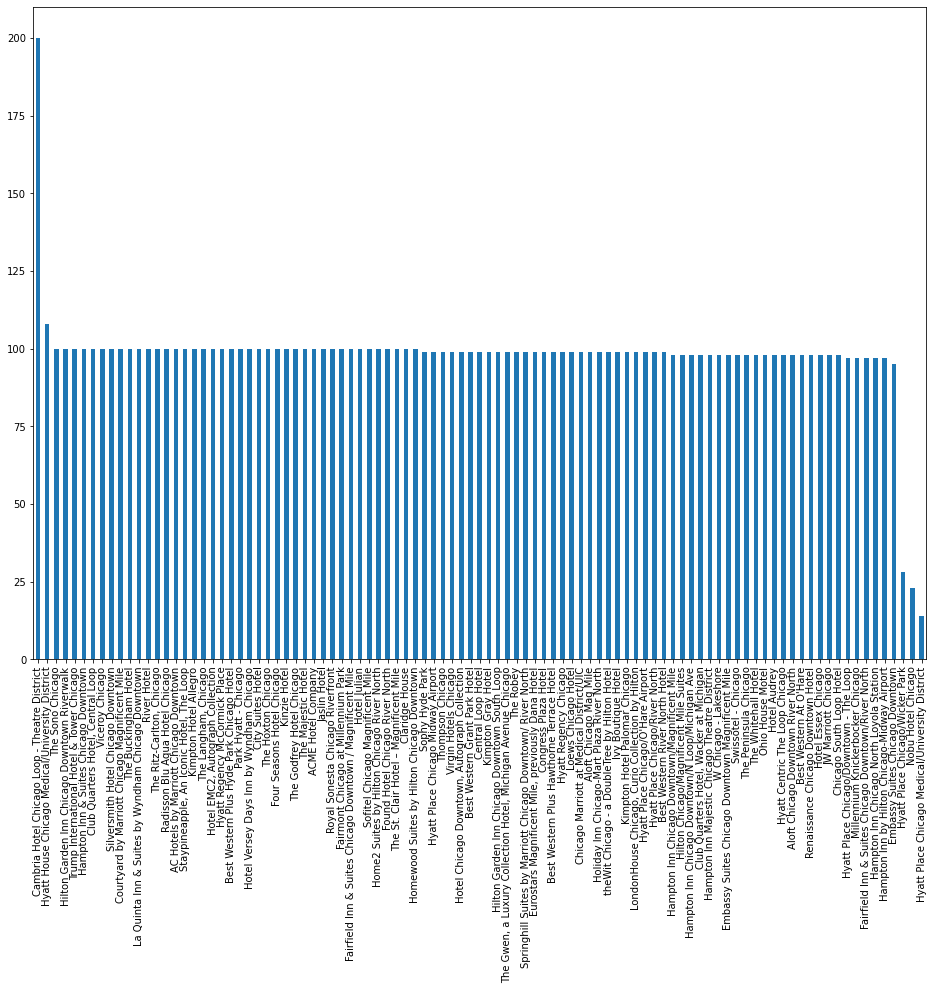

In [73]:
reviews_data.Hotel_Name.value_counts().plot(kind='bar')

Text(0, 0.5, 'Review Counts')

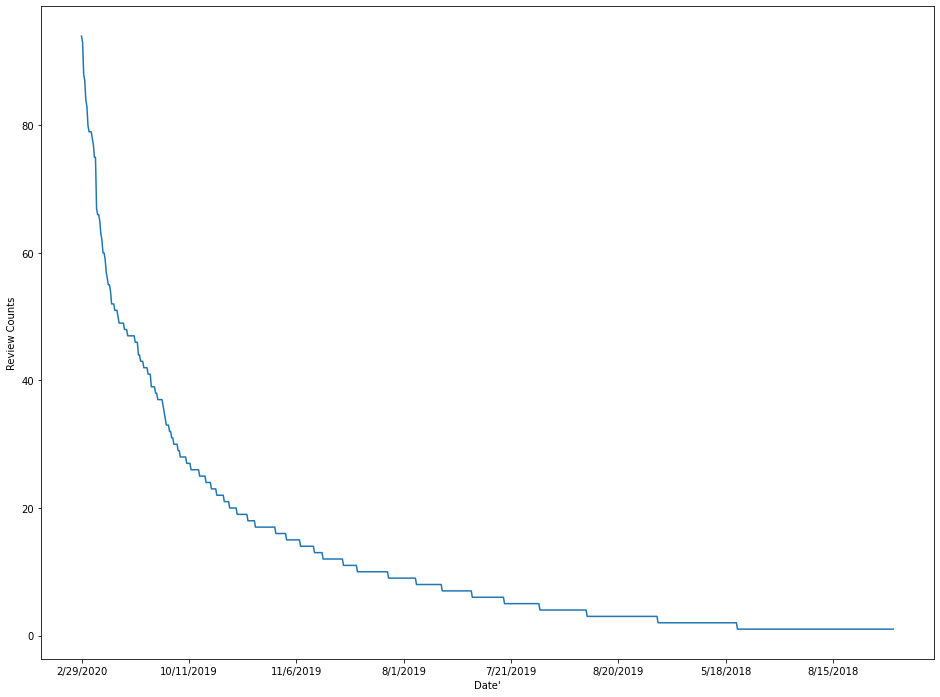

In [74]:
reviews_data.Date.value_counts().plot(kind='line')
plt.xlabel("Date'")
plt.ylabel("Review Counts")

Text(0, 0.5, 'Frequency')

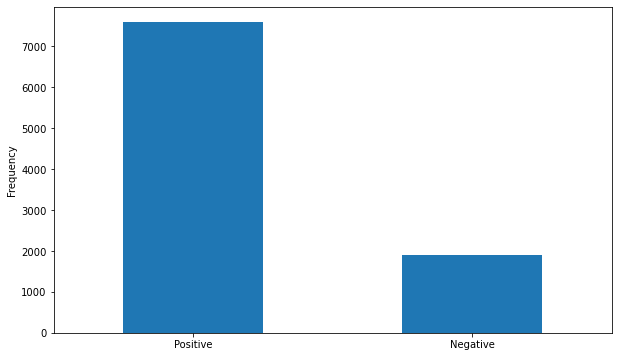

In [75]:
# Tweets by Sentiment
reviews_data.Sentiment.value_counts().plot(kind='bar',figsize=(10,6), rot=0)
plt.ylabel("Frequency")

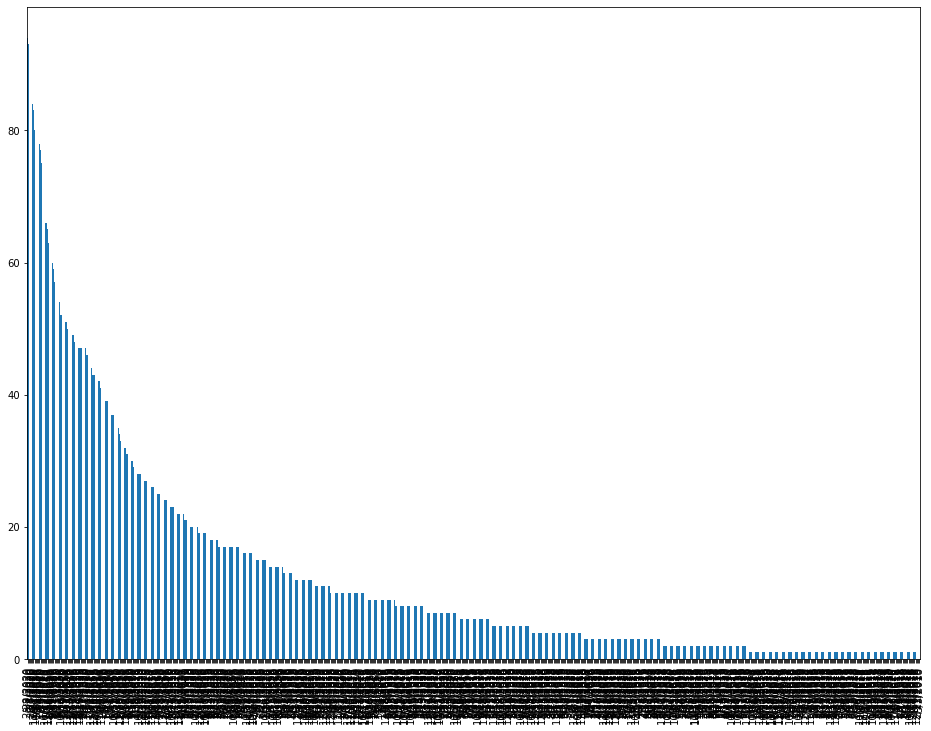

In [76]:
reviews_data.Date.value_counts().plot(kind='bar')

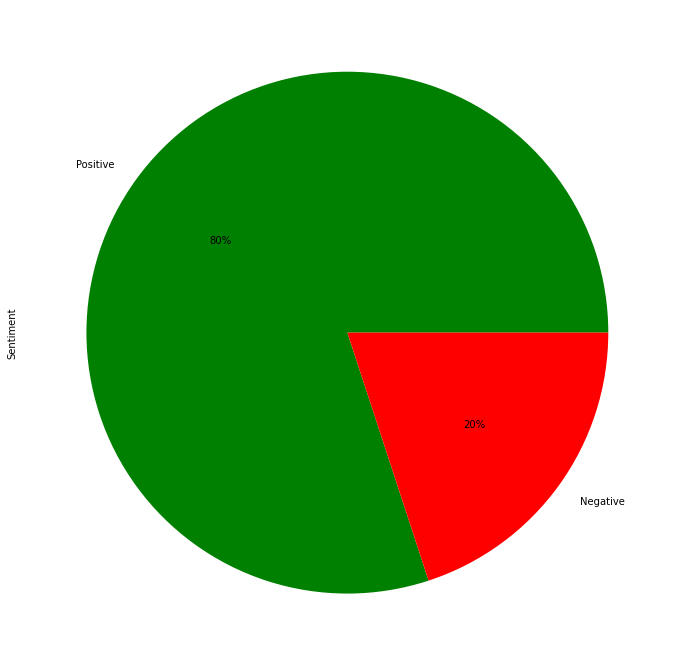

In [77]:
reviews_data.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red"])

Text(0.5, 0, 'Hotel Name')

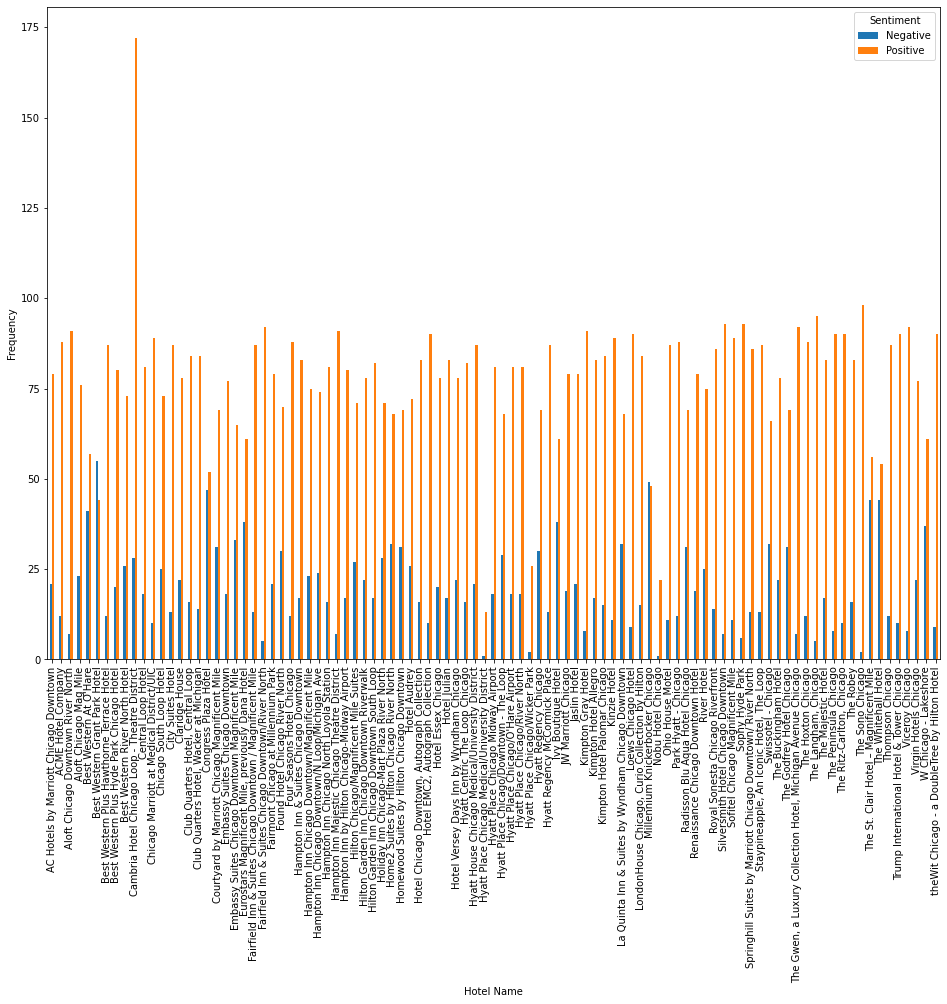

In [103]:
hotel_sentiment = reviews_data.groupby(['Hotel_Name', 'Sentiment']).Sentiment.count().unstack()
hotel_sentiment.plot(kind='bar')
plt.ylabel("Frequency")
plt.xlabel("Hotel Name")

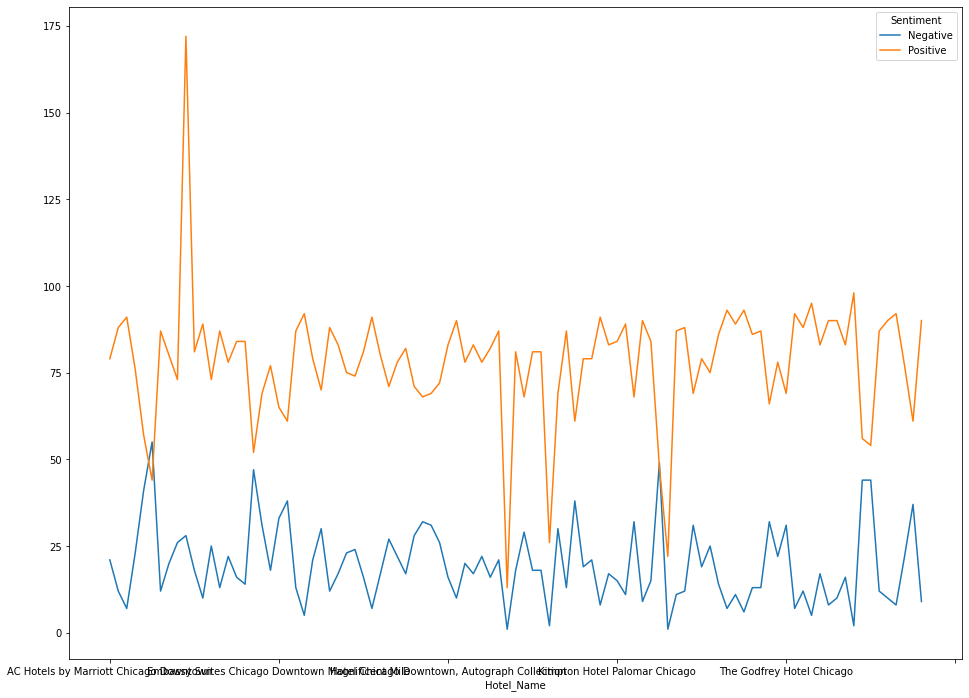

In [80]:
hotel_sentiment = reviews_data.groupby(['Hotel_Name', 'Sentiment']).Sentiment.count().unstack()
hotel_sentiment.plot(kind='line')

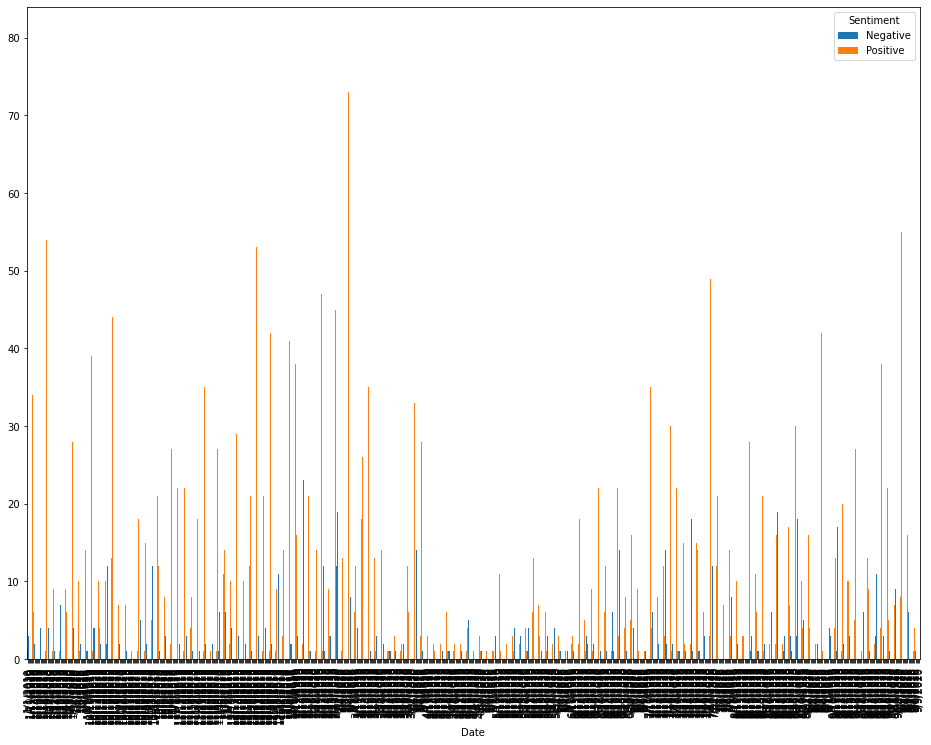

In [81]:
date_sentiment = reviews_data.groupby(['Date', 'Sentiment']).Sentiment.count().unstack()
date_sentiment.plot(kind='bar')

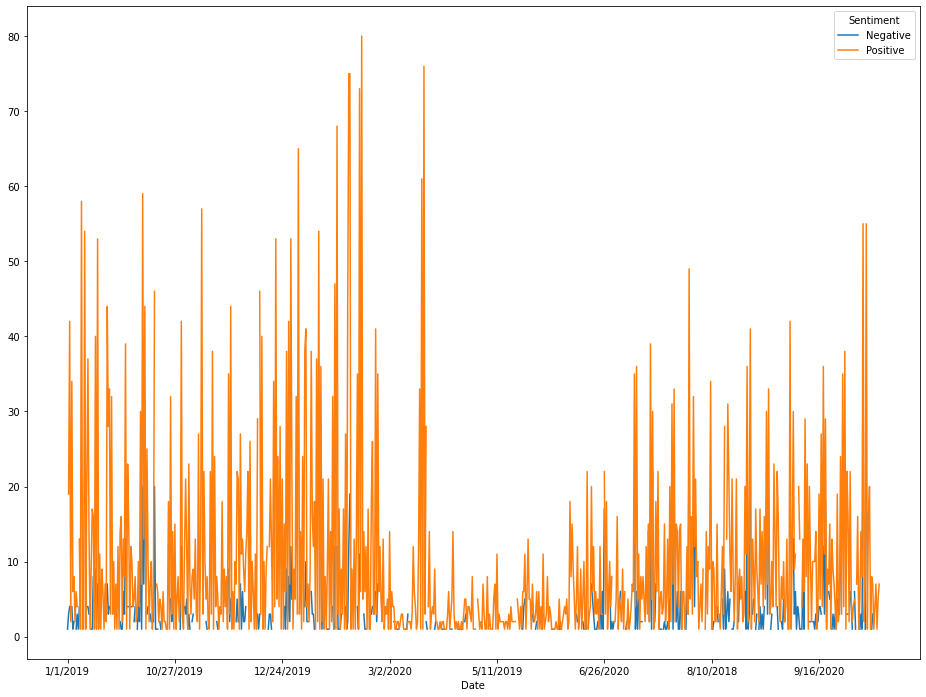

In [82]:
date_sentiment = reviews_data.groupby(['Date', 'Sentiment']).Sentiment.count().unstack()
date_sentiment.plot(kind='line')

Text(0, 0.5, 'Frequency')

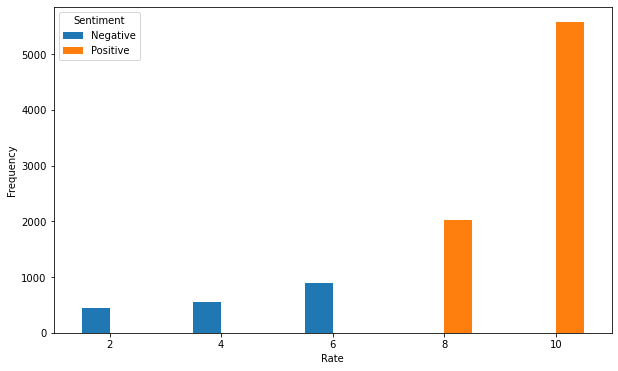

In [83]:
Rate_sentiment = reviews_data.groupby(['Rate', 'Sentiment']).Sentiment.count().unstack()
Rate_sentiment.plot(kind='bar',figsize=(10,6), rot=0)
plt.ylabel("Frequency")

In [84]:
import datetime as dt
reviews_data['Date'] = pd.to_datetime(reviews_data['Date'])
reviews_data['Month'] = reviews_data['Date'].dt.month
reviews_data['Day'] = reviews_data['Date'].dt.day

In [85]:
reviews_data['Date'].groupby([reviews_data.Date.dt.month, reviews_data.Date.dt.day]).agg('count')

Date  Date
1     1       23
      2       41
      3       53
      4       41
      5       13
              ..
12    27      53
      28      74
      29      26
      30      48
      31      86
Name: Date, Length: 366, dtype: int64

In 2018, most of people tweet from Apr to Jun while people likely to tweet in first quarter in 2019

# Topic Modelling

In [86]:
vectorizer = CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [87]:
reviews_values = reviews_data['Review'].values.astype('U')
doc_term_matrix = vectorizer.fit_transform(reviews_values)

In [88]:
doc_term_matrix.shape

(9488, 2452)

Using Latent Dirichlet allocation (LDA) create 3 to 4 topics. What do each of the topics represent? Justify your answer (1 pt).

In [89]:
LDA = LatentDirichletAllocation(n_components=5, random_state=35)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=35)

In [90]:
# First topic
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(vectorizer.get_feature_names()[i])

servic
help
nice
love
clean
friendli
room
locat
great
staff


In [91]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['servic', 'help', 'nice', 'love', 'clean', 'friendli', 'room', 'locat', 'great', 'staff']


Top 10 words for topic #1:
['like', 'servic', 'didnt', 'day', 'time', 'park', 'desk', 'night', 'check', 'room']


Top 10 words for topic #2:
['happi', 'free', 'locat', 'recommend', 'great', 'room', 'servic', 'breakfast', 'good', 'excel']


Top 10 words for topic #3:
['good', 'shop', 'distanc', 'nice', 'restaur', 'great', 'close', 'walk', 'park', 'locat']


Top 10 words for topic #4:
['like', 'locat', 'small', 'bathroom', 'comfort', 'great', 'nice', 'bed', 'clean', 'room']




Add a new column to your dataframe containing the LDA topic number

In [92]:
topic_values = LDA.transform(doc_term_matrix)

topic_values.shape

reviews_data['topic'] = topic_values.argmax(axis=1)

In [93]:
reviews_data.head()

,URL,Hotel_Name,Date,Rate,Review,Sentiment,Month,Day,topic
0,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-19,8,good,Positive,10,19,2
1,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-20,4,veri disappoint hallway carpet old dirti elev ...,Negative,10,20,1
2,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-18,4,cheap room clean water damag everywher toilet ...,Negative,10,18,1
3,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-17,10,staff extrem accommod nice realli respect covi...,Positive,10,17,0
4,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-17,6,comfort disgust didnt realiz morn pull off,Negative,10,17,1


Generate 3 to 4 topics using Non-Negative Matrix Factorization (NMF). Explain what each topic represents. Justify your responses (1 pt).

In [94]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

doc_term_matrix2 = tfidf_vect.fit_transform(reviews_data['Review'].values.astype('U'))

In [95]:
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix2)

NMF(n_components=5, random_state=42)

In [96]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

beauti
check
love
comfort
bed
servic
clean
amaz
view
room


In [97]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['beauti', 'check', 'love', 'comfort', 'bed', 'servic', 'clean', 'amaz', 'view', 'room']


Top 10 words for topic #1:
['staff', 'price', 'restaur', 'awesom', 'view', 'place', 'definit', 'servic', 'locat', 'great']


Top 10 words for topic #2:
['wonder', 'welcom', 'super', 'excel', 'accommod', 'locat', 'clean', 'help', 'friendli', 'staff']


Top 10 words for topic #3:
['breakfast', 'quiet', 'realli', 'room', 'place', 'staff', 'comfort', 'clean', 'veri', 'nice']


Top 10 words for topic #4:
['distanc', 'perfect', 'place', 'restaur', 'walk', 'park', 'close', 'locat', 'everyth', 'good']




In [98]:
topic_values2 = nmf.transform(doc_term_matrix2)
reviews_data['topic2'] = topic_values2.argmax(axis=1)
reviews_data.head()

,URL,Hotel_Name,Date,Rate,Review,Sentiment,Month,Day,topic,topic2
0,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-19,8,good,Positive,10,19,2,4
1,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-20,4,veri disappoint hallway carpet old dirti elev ...,Negative,10,20,1,0
2,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-18,4,cheap room clean water damag everywher toilet ...,Negative,10,18,1,0
3,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-17,10,staff extrem accommod nice realli respect covi...,Positive,10,17,0,3
4,https://www.hotels.com/ho106418/?q-check-out=2...,The Whitehall Hotel,2020-10-17,6,comfort disgust didnt realiz morn pull off,Negative,10,17,1,0


In [99]:
reviews_data['is_topic_similar'] = np.where(reviews_data['topic']==reviews_data['topic2'],'yes','no')

Text(0, 0.5, 'Frequency')

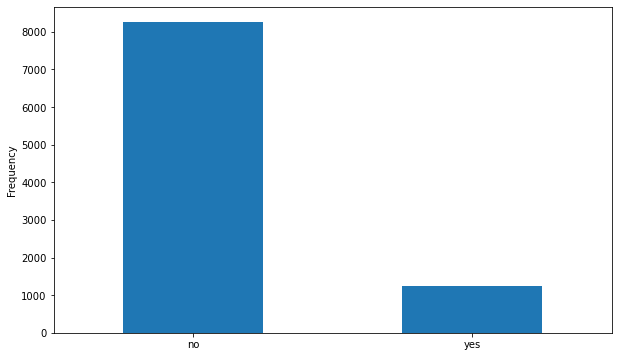

In [100]:
reviews_data.is_topic_similar.value_counts().plot(kind='bar',figsize=(10,6), rot=0)
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency od Reviews')

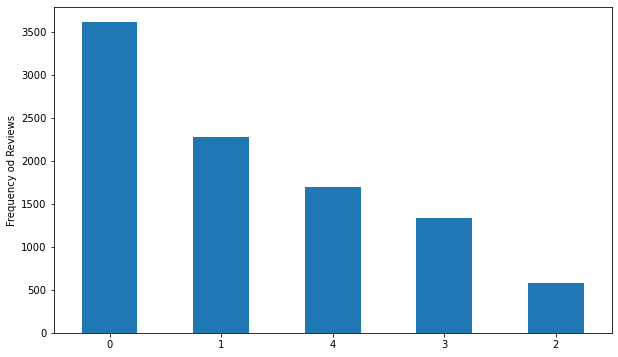

In [101]:
reviews_data.topic.value_counts().plot(kind='bar',figsize=(10,6), rot=0)
plt.ylabel("Frequency od Reviews")

Text(0, 0.5, 'Frequency od Reviews')

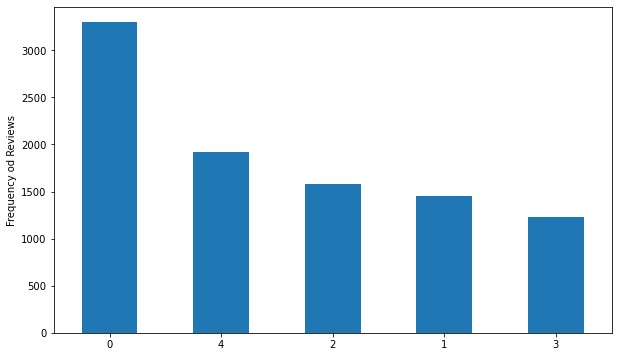

In [102]:
reviews_data.topic2.value_counts().plot(kind='bar',figsize=(10,6), rot=0)
plt.ylabel("Frequency od Reviews")

In [37]:
subset = reviews_data[["Review","topic","topic2"]]

Select 5 Tweets from your data along with their LDA and NMF values

In [38]:
r1 = subset.loc[subset.topic2 == 0].head(1)
r2 = subset.loc[subset.topic2 == 1].head(1)
r3 = subset.loc[subset.topic2 == 2].head(1)
r4 = subset.loc[subset.topic2 == 3].head(1)
r5 = subset.loc[subset.topic2 == 4].head(1)
reviews_5 = np.concatenate((r1,r2,r3,r4,r5), axis=0)
reviews_5 = pd.DataFrame(reviews_5)
pd.set_option('display.max_colwidth', None)
reviews_5.rename(columns = {0:'Review',1:'topic_LDA',2:'topic_NMF'})


,Review,topic_LDA,topic_NMF
0,veri disappoint hallway carpet old dirti elev clean i ask water sinc water drink machin avail didnt come i call two hour complimentari water drink bring own,1,0
1,great check robot,0,1
2,cute super close mag mile bed comfi staff friendli help,4,2
3,good stay,2,3
4,staff extrem accommod nice realli respect covid social distanc guidelin,0,4


In [48]:
features = reviews_data['Review']

In [49]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stop)
processed_features = vectorizer.fit_transform(features).toarray()

In [50]:
labels = reviews_data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [51]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [52]:
predictions = text_classifier.predict(X_test)

In [53]:
cm = confusion_matrix(y_test,predictions)
print(cm)

[[ 189  188]
 [  46 1475]]


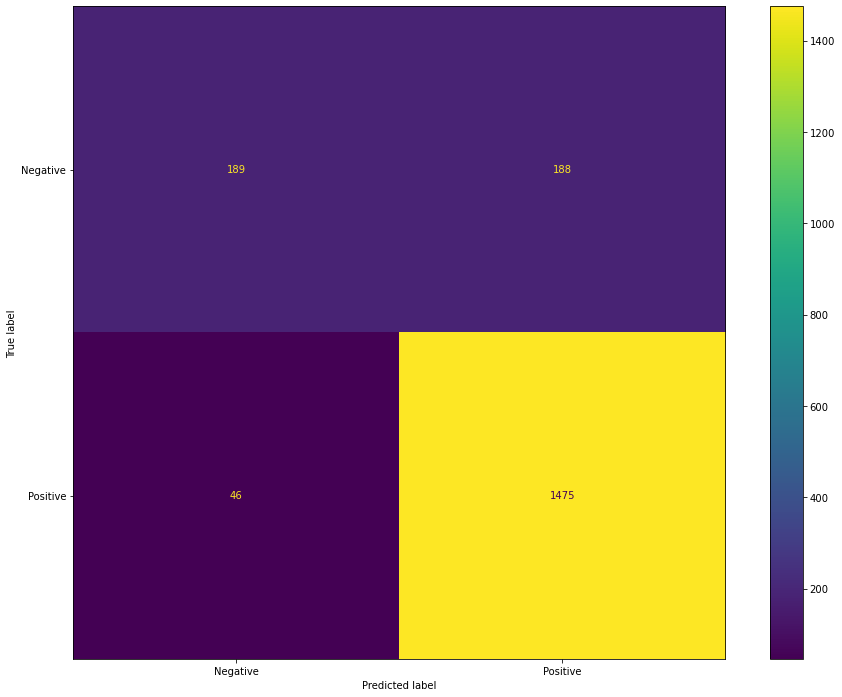

In [54]:
plot_confusion_matrix(text_classifier, X_test, y_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.80      0.50      0.62       377
    Positive       0.89      0.97      0.93      1521

    accuracy                           0.88      1898
   macro avg       0.85      0.74      0.77      1898
weighted avg       0.87      0.88      0.87      1898



In [56]:
print(accuracy_score(y_test, predictions))

0.8767123287671232
